## Xingyu Liu DAV 6150 - Assignment 8

## Introduction

In this report, I will be applying the full data science project lifecycle to the implementation of logistic regression model on a data set consisting of data on 12 different conditions on mortgage lender to find the best logistic regression model for the "deny" attribute. This information will be used by either a bank manager to judge whether the discrimination in mortage exists, or by the borrower who wants to loan from bank to predict the successful rate of the mortgage based on his private situation. borrowers will use these predictions to choose whether or not to loan from the bank, the bank manager will use the predictions to see whether the discrimination exists in working process, and then adjust the administration strategy. Then, I will use KNN method and SVM method to see what is the best model trying different exploratory variables.

To accomplish this, I will first perform an exploratory data analysis ("EDA") on each of the variables in an effort to discover any data integrity issues (i.e. missing or invalid values), uncover any outliers, and see the distribution of our data. 

Then, based on the results of our EDA, I will perform the necessary data preparation and cleaning in order to prepare the data for use in a machine learning model. This work will be guided by our domain knowledge and our EDA. I will again perform an EDA on our transformed data, in order to see the effects of our transformations on the data. We will compare the results of our transformed data to those of the original data and discuss how our transformations will lead to a better machine learning model.

Then I will create different logistic regression models based on different exploratory variables,to see which model best predicts the "deny" attribute.

Then I will split the data into training and testing data set,create different KNN and SVM models using different combinations of exploratory variables, then select the “best” classification model from those I have constructed. 

## Data Profiling & Domain Knowledge Development

**dir** debt payments to total income ratio: Your debt-to-income ratio is all your monthly debt payments divided by your gross monthly income. This number is one way lenders measure your ability to manage the monthly payments to repay the money you plan to borrow. ... To calculate your debt-to-income ratio, you add up all your monthly debt payments and divide them by your gross monthly income. Evidence from studies of mortgage loans suggest that borrowers with a higher debt-to-income ratio are more likely to run into trouble making monthly payments. The 43 percent debt-to-income ratio is important because, in most cases, that is the highest ratio a borrower can have and still get a Qualified Mortgage. According to [this link](https://www.consumerfinance.gov/ask-cfpb/what-is-a-debt-to-income-ratio-why-is-the-43-debt-to-income-ratio-important-en-1791/#:~:text=Your%20debt%2Dto%2Dincome%20ratio,money%20you%20plan%20to%20borrow.&text=If%20your%20gross%20monthly%20income,income%20ratio%20is%2033%20percent.).

**hir** housing expenses to income ratio，the housing expense ratio is the percentage of your gross monthly income devoted to housing expenses. Your lender uses a top ratio and a bottom ratio in deciding what you can afford in housing expenses. The top ratio is calculated by dividing your new monthly mortgage payment by your monthly gross income. Typically, this ratio should not exceed 28%. The bottom ratio is equal to your new monthly mortgage payment plus your monthly debt divided by your gross income per month. Typically, this ratio should not exceed 36%. According to [this link](https://www.quickenloans.com/mortgage-glossary/housing-expense-ratio)

**lvr** ratio of size of loan to assessed value of property, loan to Value Ratio is calculated by dividing the loan amount by the actual purchase price or valuation of the property, then multiplying it by 100. Generally, full doc applicants (income evidence provided) can borrow up to 80% LVR. However, strong applicants can potentially borrow between 90% and 95% LVR! Low doc applicants (self employed with no income evidence) can borrow up to 60% and possibly up to 80% LVR, if they’re in a strong financial position. According to [this link](https://www.homeloanexperts.com.au/home-loan-articles/loan-to-value-ratio-lvr/#:~:text=Loan%20details-,How%20is%20LVR%20calculated%3F,security%20is%20valued%20at%20%24300%2C000.)

**ccs** consumer credit score from 1 to 6 (a low value being a good score)

**mcs** mortgage credit score from 1 to 4 (a low value being a good score)

**pbcr** public bad credit record: Public records come from government documents. A public record with adverse information could indicate you stopped paying your debt, which could crush your credit.

You may notice a “public record” on your credit reports after the following events:

- You declare bankruptcy
- You lose your home through foreclosure
- You don’t pay your taxes
- You’re sued and owe a debt through the court as a result

According to [this link](https://www.creditkarma.com/advice/i/long-public-records-stay-credit-report#:~:text=Public%20records%20could%20plague%20your,your%20credit%20reports%20by%20mistake.)

**dmi** denied mortgage insurance: Mortgage insurance is designed to protect your lender in case you default on your home loan. Whether you should get mortgage insurance or will be required to have it, depends on the terms of your loan. The actual premium you pay depends on the loan type, loan terms, and your risk level.

**self** self employed: A self-employed person refers to any person who earns their living from any independent pursuit of economic activity as opposed to earning a living working for a company or another individual (an employer). In the United States, any person is considered self-employed for tax purposes if that person is running a business as a sole proprietorship, independent contractor, as a member of a partnership, or as a member of a limited liability company that does not elect to be treated as a corporation.

**single** is the applicant single (unmarried)?

**uria** 1989 Massachusetts unemployment rate in the applicant's industry

**condominium**  is unit a condominium? A condominium, often shortened to condo in the United States and in most Canadian provinces, is a type of living space similar to an apartment but independently sellable and therefore regarded as real estate. According to [this link](https://en.wikipedia.org/wiki/Condominium)

**black** is the applicant black?

**deny** mortgage application denied?

## Exploratory Data Analysis

First I will read the data into python using pandas read xls function. Then we will look for missing and/or invalid data values and perform an exploratory data analysis on dataset to determine what data need to be prepared for a future machine learning model. 

In [126]:
#first import the necessary libraries and modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn as metrics

mortgage = pd.read_excel("M7_Data.xls")

#check results
mortgage.head()

,Unnamed: 0,dir,hir,lvr,ccs,mcs,pbcr,dmi,self,single,uria,comdominiom,black,deny
0,1,0.221,0.221,0.800000,5.0,2.0,no,no,no,no,3.9,0,no,no
1,2,0.265,0.265,0.921875,2.0,2.0,no,no,no,yes,3.2,0,no,no
2,3,0.372,0.248,0.920398,1.0,2.0,no,no,no,no,3.2,0,no,no
3,4,0.320,0.250,0.860465,1.0,2.0,no,no,no,no,4.3,0,no,no
4,5,0.360,0.350,0.600000,1.0,1.0,no,no,no,no,3.2,0,no,no


In [127]:
#check the dataset for null values
mortgage.isnull().sum()

Unnamed: 0     0
dir            0
hir            0
lvr            0
ccs            0
mcs            0
pbcr           1
dmi            0
self           1
single         0
uria           0
comdominiom    0
black          0
deny           0
dtype: int64

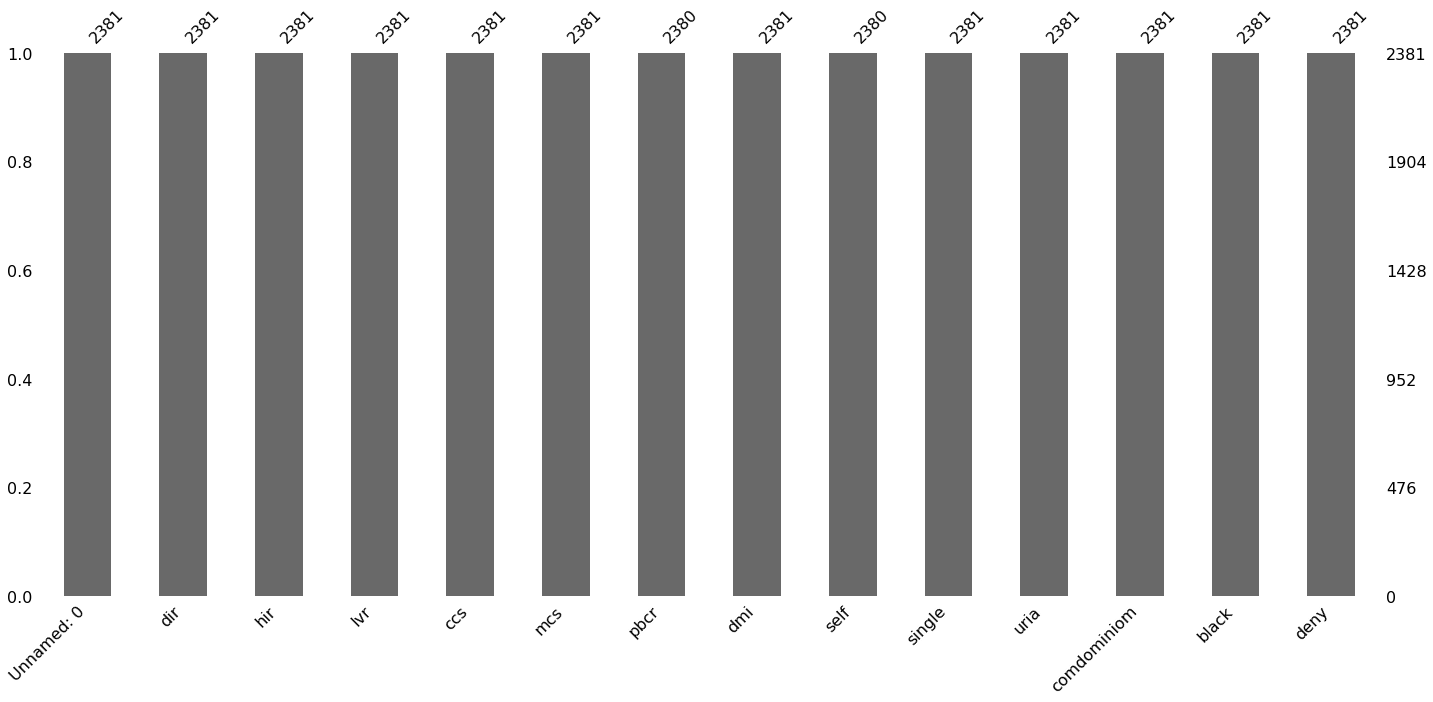

In [128]:
#first import missingno after pip install
import missingno as msno

#visualize the amount of missing data using missingno's bar chart
msno.bar(mortgage);

I see that the variables pbcr, self having missing values of all variables. But very seldom.  

In [129]:
#get summary statistics for each variable, including mean, standard deviation, median, quartiles, and range
mortgage.describe()

,Unnamed: 0,dir,hir,lvr,ccs,mcs,uria,comdominiom
count,2381.000000,2381.000000,2381.000000,2381.000000,2381.000000,2381.000000,2381.000000,2381.000000
mean,1191.000000,0.330814,0.255346,0.737760,2.116387,1.721008,3.774496,0.288114
std,687.479818,0.107235,0.096635,0.178715,1.666370,0.537169,2.026636,0.452980
min,1.000000,0.000000,0.000000,0.020000,1.000000,1.000000,1.800000,0.000000
25%,596.000000,0.280000,0.214000,0.652850,1.000000,1.000000,3.100000,0.000000
50%,1191.000000,0.330000,0.260000,0.779412,1.000000,2.000000,3.200000,0.000000
75%,1786.000000,0.370000,0.298800,0.868421,2.000000,2.000000,3.900000,1.000000
max,2381.000000,3.000000,3.000000,1.950000,6.000000,4.000000,10.600000,1.000000


We see from above that the range of all variables are positive. 

Now we will investigate further to see if the locations of the missing data are correlated by using missingno library's heatmap function. This investigation will help us determine how to treat missing values in our data preparation phase. 

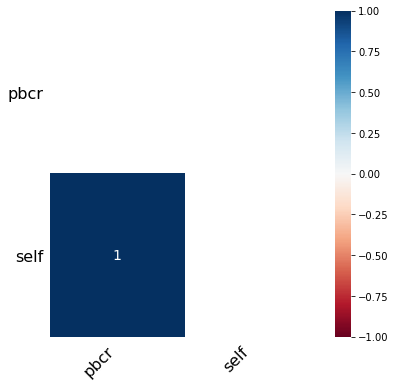

In [130]:
#graph a heat map of the missing data to see if the locations where the data are missing are correlated.
#code as referenced in O'Reilley's Machine Learning Pocket Reference
ax = msno.heatmap(mortgage, figsize = (6,6))
ax.get_figure(); #add a ; at the end to prevent it from displaying twice

I found the missing variables of self and pbcr have very strong correlation which equal to 1, that implies there may be causality between them. With my domian knowledge, self-employed persom has less stable income comparing with employed by others, self-employed person has more probability to delay the repayment of credit card loan, thus makes bad credit card record. Also, from data profiling, one person may notice a “public record” on credit reports after he declares bankruptcy and don’t pay taxes, the self-employed may have company, and he may have more invisible income which evades the taxes. In this case, the strong correlation may denote any situation. So I will fill in the missing values using my domian knowledge in the next section. That is, no self-employed made no public bad credit record.

In [131]:
#Fill in missing values 
mortgage = mortgage.replace(np.nan,'no')

Then I will plot the histograms for numeric variables:

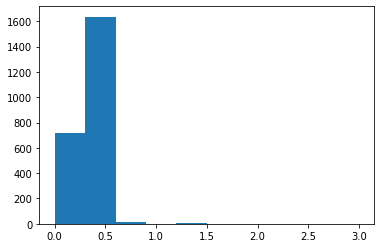

In [132]:
## Histogram of dir
plt.hist(mortgage['dir'], bins = 10)
plt.show()

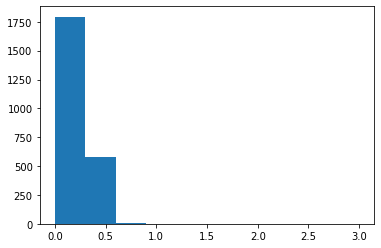

In [133]:
## Histogram of hir
plt.hist(mortgage['hir'], bins = 10)
plt.show()

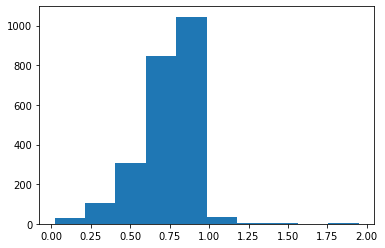

In [134]:
## Histogram of lvr
plt.hist(mortgage['lvr'], bins = 10)
plt.show()

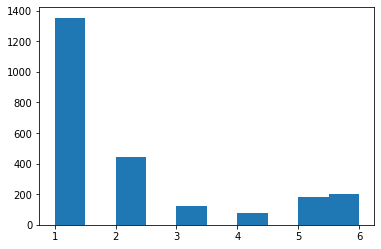

In [135]:
## Histogram of ccs
plt.hist(mortgage['ccs'], bins = 10)
plt.show()

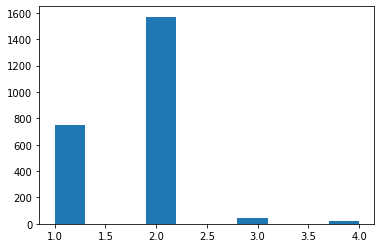

In [136]:
## Histogram of mcs
plt.hist(mortgage['mcs'], bins = 10)
plt.show()

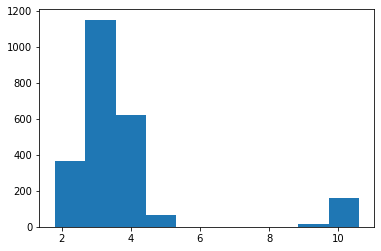

In [137]:
## Histogram of uria
plt.hist(mortgage['uria'], bins = 10)
plt.show()

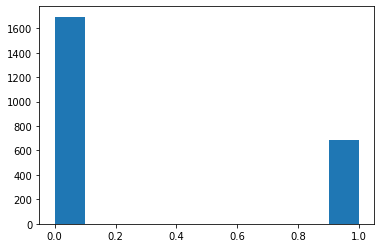

In [138]:
## Histogram of comdominiom
plt.hist(mortgage['comdominiom'], bins = 10)
plt.show()

From the above histograms, I see that the majority of our numeric attributes are with no specific distribution. Except dir, hir and lvr are a little skewed distributed.

Next we will look at boxplots of our data to see if there are any outliers.

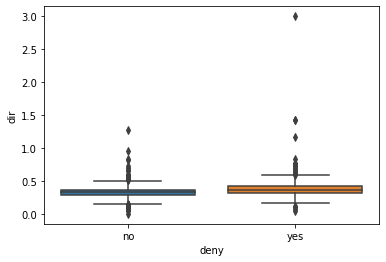

In [139]:
## Boxplot of dir
sns.boxplot(x='deny',y='dir',data = mortgage)

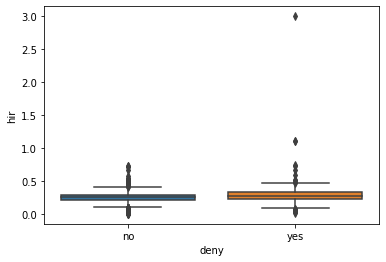

In [140]:
## Boxplot of dir
sns.boxplot(x='deny',y='hir',data = mortgage)

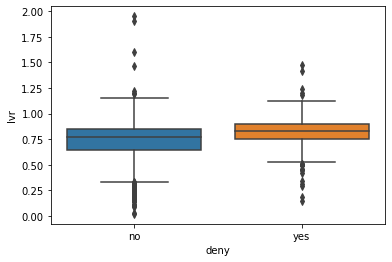

In [141]:
## Boxplot of lvr
sns.boxplot(x='deny',y='lvr',data = mortgage)

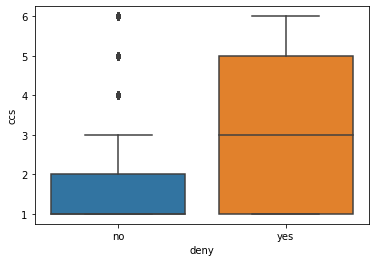

In [142]:
## Boxplot of ccs
sns.boxplot(x='deny',y='ccs',data = mortgage)

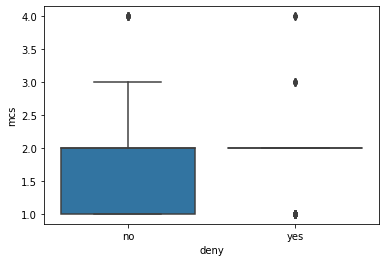

In [143]:
## Boxplot of mcs
sns.boxplot(x='deny',y='mcs',data = mortgage)

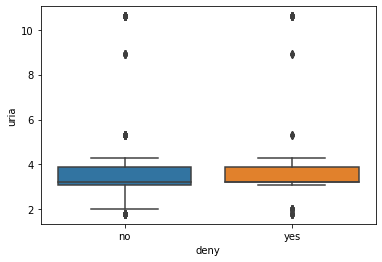

In [144]:
## Boxplot of uria
sns.boxplot(x='deny',y='uria',data = mortgage)

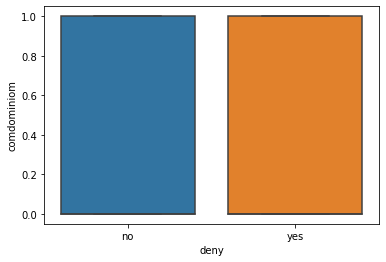

In [145]:
## Boxplot of comdominiom
sns.boxplot(x='deny',y='comdominiom',data = mortgage)

From the above boxplots I see that most of attributes have numerous outliers. I will discuss further below how I will deal with these outliers.


I will also check a correlation matrix between the variables before any transformation to see if my transformations have any effect on the correlation.

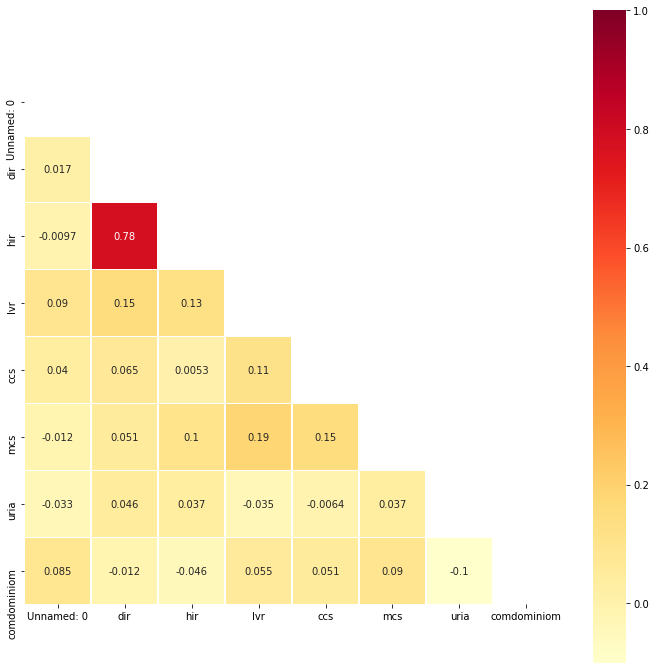

In [146]:
cor_matrix = mortgage.corr()
# Generate a mask for the upper triangle
mask = np.zeros_like(cor_matrix, dtype = np.bool)
mask[np.triu_indices_from(mask)] = True
# Set up the matplotlib figure
f, ax = plt.subplots(figsize = (12, 12))
#Draw the heatmap with the mask and correct aspect ratio,mask=True,upper triangular will be hide
sns.heatmap(cor_matrix, mask=mask,
            square = True, linewidths = .5, ax = ax, cmap = "YlOrRd",annot=True)

I see from our correlation matrix that the strongest correlation of 0.78 is between dir and hir. From the domian knowledge I know that the bottom ratio of hir is equal to your new monthly mortgage payment plus your monthly debt divided by your gross income per month. Typically, this ratio should not exceed 36%. Therefore, the correlation is reasonable in real life.

## Data Preparation and EDA Review - Eliminate invalid data using my domain knowledge.

I will now eliminate invalid data using my domain knowledge.

In [147]:
#copy the data frame 
mortgage2=mortgage.copy()

#remove rows that have a dir above 0.43
mortgage2=mortgage2[mortgage2.dir<0.43]

#remove rows that have a hir above 0.28
mortgage2=mortgage2[(mortgage2.hir<0.28)]

#remove rows that have a lvr below 0.60
mortgage2=mortgage2[(mortgage2.lvr>0.60)]

#check shape
mortgage2.shape

(1118, 14)

### Plot the histograms again to see whether the distributions have been changed:

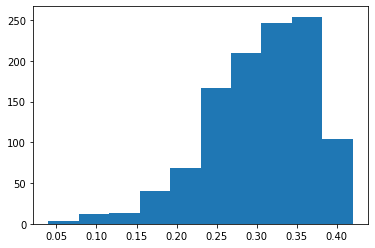

In [148]:
## Histogram of dir
plt.hist(mortgage2['dir'], bins = 10)
plt.show()

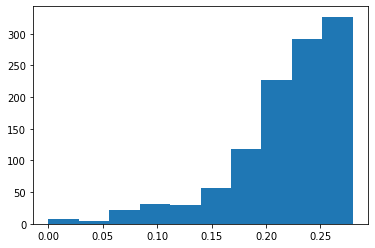

In [149]:
## Histogram of hir
plt.hist(mortgage2['hir'], bins = 10)
plt.show()

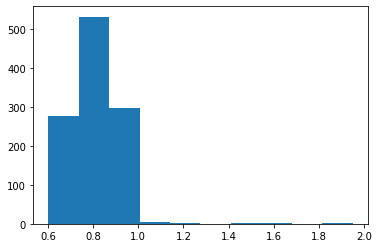

In [150]:
## Histogram of lvr
plt.hist(mortgage2['lvr'], bins = 10)
plt.show()

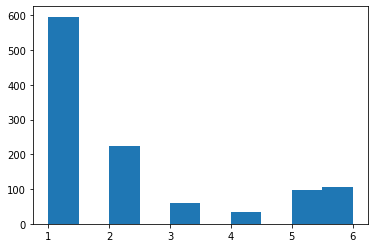

In [151]:
## Histogram of ccs
plt.hist(mortgage2['ccs'], bins = 10)
plt.show()

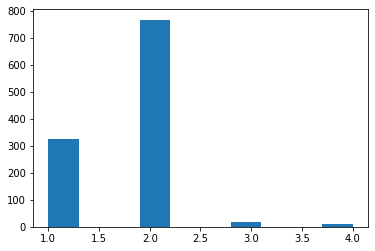

In [152]:
## Histogram of mcs
plt.hist(mortgage2['mcs'], bins = 10)
plt.show()

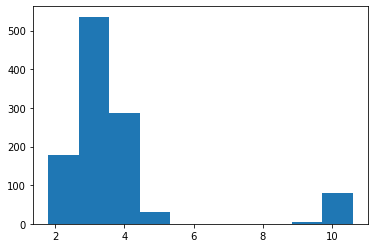

In [153]:
## Histogram of uria
plt.hist(mortgage2['uria'], bins = 10)
plt.show()

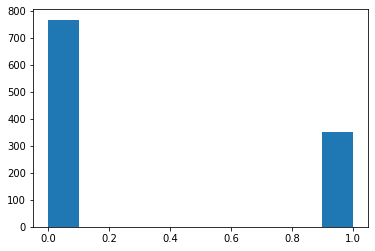

In [154]:
## Histogram of comdominiom
plt.hist(mortgage2['comdominiom'], bins = 10)
plt.show()

The histograms show dir and hir have been skewed left, lvr has been become normal distribution. Others remain the same.

Also, I will plot the boxplots again:

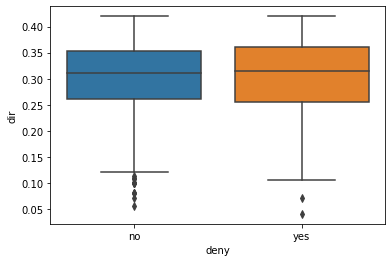

In [155]:
## Boxplot of dir
sns.boxplot(x='deny',y='dir',data = mortgage2)

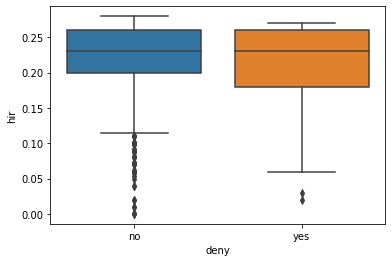

In [156]:
## Boxplot of dir
sns.boxplot(x='deny',y='hir',data = mortgage2)

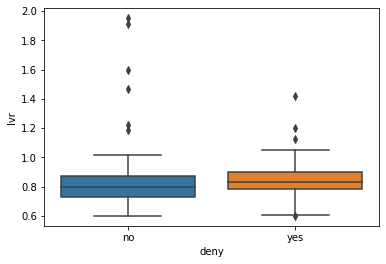

In [157]:
## Boxplot of lvr
sns.boxplot(x='deny',y='lvr',data = mortgage2)

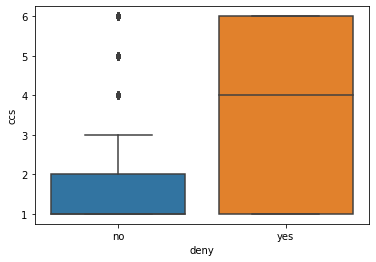

In [158]:
## Boxplot of ccs
sns.boxplot(x='deny',y='ccs',data = mortgage2)

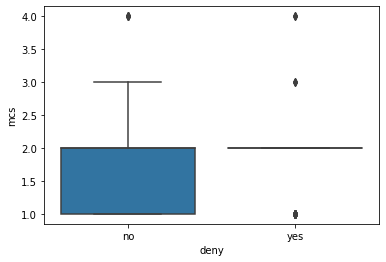

In [159]:
## Boxplot of mcs
sns.boxplot(x='deny',y='mcs',data = mortgage2)

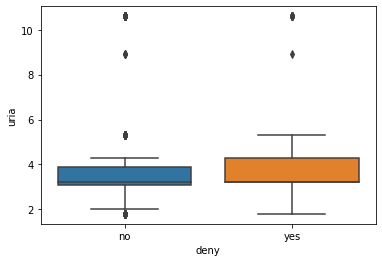

In [160]:
## Boxplot of uria
sns.boxplot(x='deny',y='uria',data = mortgage2)

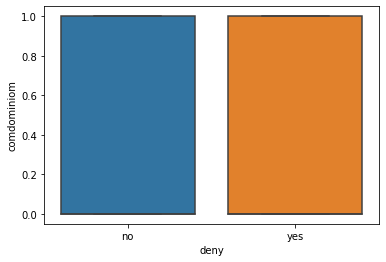

In [161]:
## Boxplot of comdominiom
sns.boxplot(x='deny',y='comdominiom',data = mortgage2)

The boxplots show the outliers have been changed too much: the outliers of dir have been moved to the downside, so as hir. The outliers of lvr have been moved to the upside, the outliers of 'yes' of uria have been moved to the upside. That means the invalid values truly cause a lot of outliers. 

## Working with Outliers: Correcting or Removing

### IQR score -
- Box plot use the IQR method to display data and outliers(shape of the data) but in order to be get a list of identified outlier, we will need to use the mathematical formula and retrieve the outlier data.
- The interquartile range (IQR), also called the midspread or middle 50%, or technically H-spread, is a measure of statistical dispersion, being equal to the difference between 75th and 25th percentiles, or between upper and lower quartiles, IQR = Q3 − Q1.
- In other words, the IQR is the first quartile subtracted from the third quartile; these quartiles can be clearly seen on a box plot on the data.
- It is a measure of the dispersion similar to standard deviation or variance, but is much more robust against outliers.
- IQR is somewhat similar to Z-score in terms of finding the distribution of data and then keeping some threshold to identify the outlier.
- First I will calculate IQR:

In [162]:
Q1 = mortgage2.quantile(0.25)
Q3 = mortgage2.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

Unnamed: 0     1211.250000
dir               0.096725
hir               0.060600
lvr               0.146109
ccs               2.000000
mcs               1.000000
uria              0.800000
comdominiom       1.000000
dtype: float64


I got IQR for each column.
As we now have the IQR scores, it’s time to get hold on outliers. The below code will give an output with some true and false values. The data point where we have False that means these values are valid whereas True indicates presence of an outlier.

In [163]:
print (((mortgage2 < (Q1 - 1.5 * IQR)) | (mortgage > (Q3 + 1.5 * IQR))))

      Unnamed: 0  black    ccs  comdominiom   deny    dir    dmi    hir  \
0          False  False  False        False  False  False  False  False   
1          False  False  False        False  False  False  False  False   
2          False  False  False        False  False  False  False  False   
3          False  False  False        False  False  False  False  False   
4          False  False  False        False  False  False  False  False   
...          ...    ...    ...          ...    ...    ...    ...    ...   
2376       False  False  False        False  False  False  False  False   
2377       False  False  False        False  False  False  False  False   
2378       False  False  False        False  False  False  False  False   
2379       False  False  False        False  False  False  False  False   
2380       False  False  False        False  False  False  False  False   

        lvr    mcs   pbcr   self  single   uria  
0     False  False  False  False   False  False  

### Filter out the outliers by keeping only valid values.

In [164]:
mortgage3 = mortgage2.copy()
data_out = mortgage3[~((mortgage3 < (Q1 - 1.5 * IQR)) |(mortgage3 > (Q3 + 1.5 * IQR))).any(axis=1)]
data_out.shape

(833, 14)

In [165]:
data_out

,Unnamed: 0,dir,hir,lvr,ccs,mcs,pbcr,dmi,self,single,uria,comdominiom,black,deny
0,1,0.221000,0.221000,0.800000,5.000000,2.000000,no,no,no,no,3.900000,0,no,no
1,2,0.265000,0.265000,0.921875,2.000000,2.000000,no,no,no,yes,3.200000,0,no,no
2,3,0.372000,0.248000,0.920398,1.000000,2.000000,no,no,no,no,3.200000,0,no,no
3,4,0.320000,0.250000,0.860465,1.000000,2.000000,no,no,no,no,4.300000,0,no,no
8,9,0.310000,0.240000,0.897260,2.000000,2.000000,no,yes,no,no,3.100000,0,no,yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2374,2375,0.330000,0.160000,0.803030,5.000000,1.000000,no,no,no,no,3.200000,0,no,no
2375,2376,0.310000,0.250000,0.800000,1.000000,1.000000,no,no,yes,no,3.200000,0,no,no
2378,2379,0.320000,0.260000,0.753846,6.000000,1.000000,yes,no,no,yes,3.100000,1,yes,yes
2379,2380,0.350000,0.260000,0.813559,2.000000,2.000000,no,no,no,yes,4.300000,1,no,yes


### From data_out and plot, I could see, the outliers really occupy large proportion of data, since I have already elimated lots of data before, If I decide to eliminate the outliers, the data set would be too parse to evaluate, therefore, I decide to subsitute the outliers by means.

In [166]:
def replace(group):
    mean, std = group.mean(), group.std()
    outliers = (group - mean).abs() > 3*std
    group[outliers] = mean        
    return group

In [167]:
replace(mortgage3.dir)

/Users/xingyuliu/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


0       0.221000
1       0.265000
2       0.372000
3       0.320000
7       0.280000
          ...   
2374    0.330000
2375    0.310000
2378    0.320000
2379    0.350000
2380    0.330814
Name: dir, Length: 1118, dtype: float64

In [168]:
replace(mortgage3.hir)

/Users/xingyuliu/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


0       0.221000
1       0.265000
2       0.248000
3       0.250000
7       0.220000
          ...   
2374    0.160000
2375    0.250000
2378    0.260000
2379    0.260000
2380    0.255346
Name: hir, Length: 1118, dtype: float64

In [169]:
replace(mortgage3.lvr)

/Users/xingyuliu/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


0       0.800000
1       0.921875
2       0.920398
3       0.860465
7       0.850000
          ...   
2374    0.803030
2375    0.800000
2378    0.753846
2379    0.813559
2380    0.700783
Name: lvr, Length: 1118, dtype: float64

In [170]:
replace(mortgage3.uria)

/Users/xingyuliu/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


0       3.900000
1       3.200000
2       3.200000
3       4.300000
7       1.800000
          ...   
2374    3.200000
2375    3.200000
2378    3.100000
2379    4.300000
2380    3.774496
Name: uria, Length: 1118, dtype: float64

## Logistic Regression Modeling

Now that I have our data prepared, I will begin building regression models to see which type of model as well as which features yield the best results. 

In [171]:
# Load the LogisticRegression() function from sklearn's 'linear_model' sub-library
from sklearn.linear_model import LogisticRegression
# Display the head of the data set
mortgage3.head()

,Unnamed: 0,dir,hir,lvr,ccs,mcs,pbcr,dmi,self,single,uria,comdominiom,black,deny
0,1,0.221,0.221,0.800000,5.0,2.0,no,no,no,no,3.9,0,no,no
1,2,0.265,0.265,0.921875,2.0,2.0,no,no,no,yes,3.2,0,no,no
2,3,0.372,0.248,0.920398,1.0,2.0,no,no,no,no,3.2,0,no,no
3,4,0.320,0.250,0.860465,1.0,2.0,no,no,no,no,4.3,0,no,no
7,8,0.280,0.220,0.850000,2.0,2.0,no,no,no,no,1.8,0,no,no


In [172]:
series = pd.Series(mortgage3['deny'])
series.value_counts()

no     993
yes    125
Name: deny, dtype: int64

NOTE: Since we know that 993/993+125 = 0.8881932 of the people are not denied. The deny responsible variable is an imbalanced class: more than 88% of its values are '0' while less than 12% are '1'. The null error rate for the response variable is 0.882, which means that we could achieve 88.2% accuracy by simply predicting that a loan is not denied for every observation within the data set. Obviously, such a model wouldn't be very useful for purposes of deciding whether or not a mortgage application should be denied.

Change the attribute 'deny' to index:

In [173]:
mortgage3['deny'] = mortgage3.deny.astype('category').cat.codes

In [174]:
#there are 492 fraud transactions. 
mortgage3['deny'].value_counts() 

0    993
1    125
Name: deny, dtype: int64

Split the data into test and train sets

Next, __we create a dummy indicator for the 'pbcr' categorical variable__: the new dummy variable 'Isbad' contains a '1' if an applicator have 'pbcr' and a '0' otherwise:

In [175]:
# create a dummy variable for the 'pbcr' attribute
mortgage3['Isbad'] = (mortgage3['pbcr'] == 'yes').astype(int)
from sklearn.model_selection import train_test_split 
X = mortgage3[['dir','hir','lvr','Isbad']]
y = mortgage3['deny']
# split into 70:30 ration 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0) 
#Now train the model without handling the imbalanced class distribution
# logistic regression object 
lr = LogisticRegression() 
# train the model on train set 
lr.fit(X_train, y_train.ravel()) 
predictions = lr.predict(X_test) 
# print classification report 
from sklearn.metrics import confusion_matrix, classification_report 
print(classification_report(y_test, predictions)) 

              precision    recall  f1-score   support

           0       0.87      1.00      0.93       292
           1       1.00      0.02      0.04        44

    accuracy                           0.87       336
   macro avg       0.94      0.51      0.49       336
weighted avg       0.89      0.87      0.82       336



The accuracy comes out to be 87%.
The recall of the minority class in very less. It proves that the model is more biased towards majority class. So, it proves that this is not the best model.
Now, we will apply different imbalanced data handling techniques and see their accuracy and recall results.

I will use the implementations provided by the imbalanced-learn Python library, which can be installed via pip as follows:

In [176]:
!pip install imbalanced-learn

In [177]:
print("Before OverSampling, counts of label '1': {}".format(sum(y_train == 1))) 
print("Before OverSampling, counts of label '0': {} \n".format(sum(y_train == 0))) 
  
# import SMOTE module from imblearn library 
from imblearn.over_sampling import SMOTE 
sm = SMOTE(random_state = 2) 
X_train_res, y_train_res = sm.fit_sample(X_train, y_train.ravel()) 
  
print('After OverSampling, the shape of train_X: {}'.format(X_train_res.shape)) 
print('After OverSampling, the shape of train_y: {} \n'.format(y_train_res.shape)) 
  
print("After OverSampling, counts of label '1': {}".format(sum(y_train_res == 1))) 
print("After OverSampling, counts of label '0': {}".format(sum(y_train_res == 0))) 

Before OverSampling, counts of label '1': 81
Before OverSampling, counts of label '0': 701 

After OverSampling, the shape of train_X: (1402, 4)
After OverSampling, the shape of train_y: (1402,) 

After OverSampling, counts of label '1': 701
After OverSampling, counts of label '0': 701


Look! that SMOTE Algorithm has oversampled the minority instances and made it equal to majority class. Both categories have equal amount of records. More specifically, the minority class has been increased to the total number of majority class.
Now see the accuracy and recall results after applying SMOTE algorithm (Oversampling).

              precision    recall  f1-score   support

           0       0.91      0.92      0.92       292
           1       0.45      0.43      0.44        44

    accuracy                           0.86       336
   macro avg       0.68      0.68      0.68       336
weighted avg       0.85      0.86      0.86       336



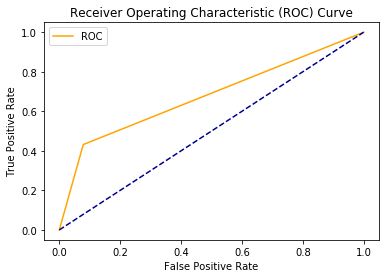

In [178]:
lr1 = LogisticRegression() 
lr1.fit(X_train_res, y_train_res.ravel()) 
predictions = lr1.predict(X_test) 
  
# print classification report 
print(classification_report(y_test, predictions)) 

from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
def plot_roc_curve(fpr, tpr):
    plt.plot(fpr, tpr, color='orange', label='ROC')
    plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend()
    plt.show()
fpr, tpr, thresholds = roc_curve(y_test,predictions)
plot_roc_curve(fpr, tpr)

I have reduced the accuracy to 70% as compared to previous model, the recall value of minority class has improved to 59%. This is a good model compared to the previous one. Recall is great.
Now, we will apply NearMiss technique to Under-sample the majority class and see its accuracy and recall results.

In [179]:
print("Before Undersampling, counts of label '1': {}".format(sum(y_train == 1))) 
print("Before Undersampling, counts of label '0': {} \n".format(sum(y_train == 0))) 
  
# apply near miss 
from imblearn.under_sampling import NearMiss 
nr = NearMiss() 
  
X_train_miss, y_train_miss = nr.fit_sample(X_train, y_train.ravel()) 
  
print('After Undersampling, the shape of train_X: {}'.format(X_train_miss.shape)) 
print('After Undersampling, the shape of train_y: {} \n'.format(y_train_miss.shape)) 
  
print("After Undersampling, counts of label '1': {}".format(sum(y_train_miss == 1))) 
print("After Undersampling, counts of label '0': {}".format(sum(y_train_miss == 0))) 

Before Undersampling, counts of label '1': 81
Before Undersampling, counts of label '0': 701 

After Undersampling, the shape of train_X: (162, 4)
After Undersampling, the shape of train_y: (162,) 

After Undersampling, counts of label '1': 81
After Undersampling, counts of label '0': 81


The NearMiss Algorithm has undersampled the majority instances and made it equal to majority class. Here, the majority class has been reduced to the total number of minority class, so that both classes will have equal number of records.

In [180]:
# train the model on train set 
lr2 = LogisticRegression() 
lr2.fit(X_train_miss, y_train_miss.ravel()) 
predictions = lr2.predict(X_test) 

# print classification report 
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.89      0.95      0.92       292
           1       0.36      0.20      0.26        44

    accuracy                           0.85       336
   macro avg       0.62      0.57      0.59       336
weighted avg       0.82      0.85      0.83       336



In this case, the accuracy has been increased but the recall has been decreased, so I will use the first model:

Next, __we create a dummy indicator for the 'self' categorical variable__: the new dummy variable 'Isself' contains a '1' if an applicator is self-employed and a '0' otherwise:

              precision    recall  f1-score   support

           0       0.91      0.57      0.70       292
           1       0.18      0.61      0.28        44

    accuracy                           0.58       336
   macro avg       0.54      0.59      0.49       336
weighted avg       0.81      0.58      0.65       336



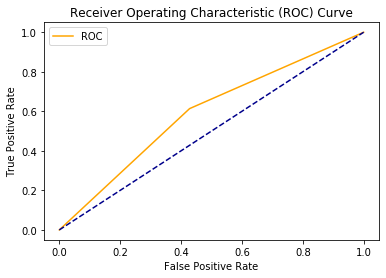

In [181]:
# create a dummy variable for the 'self' attribute
mortgage3['Isself'] = (mortgage3['self'] == 'yes').astype(int)
from sklearn.model_selection import train_test_split 
X = mortgage3[['dir','hir','lvr','Isself']]
y = mortgage3['deny']
# split into 70:30 ration 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0) 
# import SMOTE module from imblearn library 
from imblearn.over_sampling import SMOTE 
sm = SMOTE(random_state = 2) 
X_train_res, y_train_res = sm.fit_sample(X_train, y_train.ravel()) 
lr1 = LogisticRegression() 
lr1.fit(X_train_res, y_train_res.ravel()) 
predictions = lr1.predict(X_test)  
# print classification report 
from sklearn.metrics import confusion_matrix, classification_report 
print(classification_report(y_test, predictions))

from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
def plot_roc_curve(fpr, tpr):
    plt.plot(fpr, tpr, color='orange', label='ROC')
    plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend()
    plt.show()
fpr, tpr, thresholds = roc_curve(y_test,predictions)
plot_roc_curve(fpr, tpr)

The accuracy of this model is 58%, the recall is 61%, lower accuracy but good recall.

Next, __we create a dummy indicator for the 'black' categorical variable__: the new dummy variable 'Isblack' contains a '1' if an applicator is black and a '0' otherwise:

              precision    recall  f1-score   support

           0       0.92      0.80      0.86       292
           1       0.30      0.57      0.39        44

    accuracy                           0.77       336
   macro avg       0.61      0.68      0.63       336
weighted avg       0.84      0.77      0.80       336



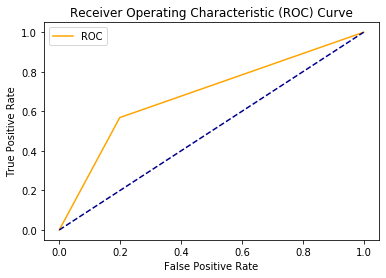

In [182]:
# create a dummy variable for the 'black' attribute
mortgage3['Isblack'] = (mortgage3['black'] == 'yes').astype(int)
from sklearn.model_selection import train_test_split 
X = mortgage3[['dir','hir','lvr','Isblack']]
y = mortgage3['deny']
# split into 70:30 ration 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0) 
# import SMOTE module from imblearn library 
from imblearn.over_sampling import SMOTE 
sm = SMOTE(random_state = 2) 
X_train_res, y_train_res = sm.fit_sample(X_train, y_train.ravel()) 
lr1 = LogisticRegression() 
lr1.fit(X_train_res, y_train_res.ravel()) 
predictions = lr1.predict(X_test)  
# print classification report 
from sklearn.metrics import confusion_matrix, classification_report 
print(classification_report(y_test, predictions))

from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
def plot_roc_curve(fpr, tpr):
    plt.plot(fpr, tpr, color='orange', label='ROC')
    plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend()
    plt.show()
fpr, tpr, thresholds = roc_curve(y_test,predictions)
plot_roc_curve(fpr, tpr)

The accuracy of this model is 77%, the recall is 57%, this model is better than the previous one.

Next, __we create a dummy indicator for the 'single' categorical variable__: the new dummy variable 'Issingle' contains a '1' if an applicator is single and a '0' otherwise:

              precision    recall  f1-score   support

           0       0.91      0.53      0.67       292
           1       0.17      0.64      0.27        44

    accuracy                           0.54       336
   macro avg       0.54      0.58      0.47       336
weighted avg       0.81      0.54      0.61       336



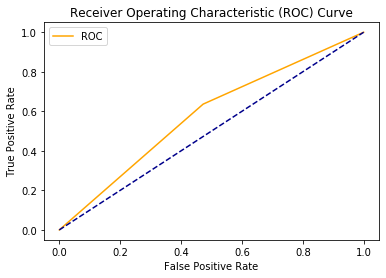

In [183]:
# create a dummy variable for the 'single' attribute
mortgage3['Issingle'] = (mortgage3['single'] == 'yes').astype(int)
from sklearn.model_selection import train_test_split 
X = mortgage3[['dir','hir','lvr','Issingle']]
y = mortgage3['deny']
# split into 70:30 ration 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0) 
# import SMOTE module from imblearn library 
from imblearn.over_sampling import SMOTE 
sm = SMOTE(random_state = 2) 
X_train_res, y_train_res = sm.fit_sample(X_train, y_train.ravel()) 
lr1 = LogisticRegression() 
lr1.fit(X_train_res, y_train_res.ravel()) 
predictions = lr1.predict(X_test)  
# print classification report 
from sklearn.metrics import confusion_matrix, classification_report 
print(classification_report(y_test, predictions))

from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
def plot_roc_curve(fpr, tpr):
    plt.plot(fpr, tpr, color='orange', label='ROC')
    plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend()
    plt.show()
fpr, tpr, thresholds = roc_curve(y_test,predictions)
plot_roc_curve(fpr, tpr)

The accuracy of this model is 54%, the recall is 64%, the accuracy is bad, so I reject this model.

Next, __we create a dummy indicator for the 'dmi' categorical variable__: the new dummy variable 'Isdmi' contains a '1' if an applicator is insured and a '0' otherwise:

              precision    recall  f1-score   support

           0       0.91      0.73      0.81       292
           1       0.22      0.50      0.31        44

    accuracy                           0.70       336
   macro avg       0.56      0.62      0.56       336
weighted avg       0.82      0.70      0.74       336



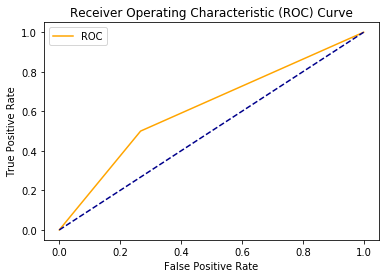

In [184]:
# create a dummy variable for the 'dmi' attribute
mortgage3['Isdmi'] = (mortgage3['dmi'] == 'yes').astype(int)
from sklearn.model_selection import train_test_split 
X = mortgage3[['dir','hir','lvr','Isdmi']]
y = mortgage3['deny']
# split into 70:30 ration 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0) 
# import SMOTE module from imblearn library 
from imblearn.over_sampling import SMOTE 
sm = SMOTE(random_state = 2) 
X_train_res, y_train_res = sm.fit_sample(X_train, y_train.ravel()) 
lr1 = LogisticRegression() 
lr1.fit(X_train_res, y_train_res.ravel()) 
predictions = lr1.predict(X_test)  
# print classification report 
from sklearn.metrics import confusion_matrix, classification_report 
print(classification_report(y_test, predictions))

from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
def plot_roc_curve(fpr, tpr):
    plt.plot(fpr, tpr, color='orange', label='ROC')
    plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend()
    plt.show()
fpr, tpr, thresholds = roc_curve(y_test,predictions)
plot_roc_curve(fpr, tpr)

The accuracy of this model is 70%, while the recall is 50%.

From the above model with different exploratory variables, the exploratory variables with 'black' attribute and 'pbcr' attribute have better ROC curve. Also, the model with exploratory variables of 'black' attribute has higher percision and higher f1 score comparing with the model with exploratory variables of 'pbcr' attribute. 

#### With all the informations above, the model with exploratory variables 'dir','hir','lvr','black' is the best.

Still try some other models adding some exploratory variables with 'dir','hir','lvr','black' remains the same.

              precision    recall  f1-score   support

           0       0.93      0.78      0.85       292
           1       0.29      0.59      0.39        44

    accuracy                           0.76       336
   macro avg       0.61      0.69      0.62       336
weighted avg       0.84      0.76      0.79       336



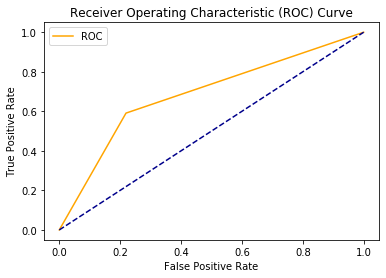

In [185]:
from sklearn.model_selection import train_test_split 
X = mortgage3[['dir','hir','lvr','Isblack','comdominiom']]
y = mortgage3['deny']
# split into 70:30 ration 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0) 
# import SMOTE module from imblearn library 
from imblearn.over_sampling import SMOTE 
sm = SMOTE(random_state = 2) 
X_train_res, y_train_res = sm.fit_sample(X_train, y_train.ravel()) 
lr1 = LogisticRegression() 
lr1.fit(X_train_res, y_train_res.ravel()) 
predictions = lr1.predict(X_test)  
# print classification report 
from sklearn.metrics import confusion_matrix, classification_report 
print(classification_report(y_test, predictions))

from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
def plot_roc_curve(fpr, tpr):
    plt.plot(fpr, tpr, color='orange', label='ROC')
    plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend()
    plt.show()
fpr, tpr, thresholds = roc_curve(y_test,predictions)
plot_roc_curve(fpr, tpr)

The model with exploratory variables 'dir','hir','lvr','black','comdominiom' increased the recall while decreasing the accuracy comparing with the model with exploratory variables 'dir','hir','lvr','black.

              precision    recall  f1-score   support

           0       0.92      0.74      0.82       292
           1       0.25      0.57      0.35        44

    accuracy                           0.72       336
   macro avg       0.58      0.66      0.58       336
weighted avg       0.83      0.72      0.76       336



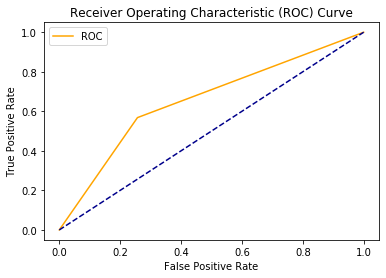

In [186]:
from sklearn.model_selection import train_test_split 
X = mortgage3[['dir','hir','lvr','Isblack','uria']]
y = mortgage3['deny']
# split into 70:30 ration 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0) 
# import SMOTE module from imblearn library 
from imblearn.over_sampling import SMOTE 
sm = SMOTE(random_state = 2) 
X_train_res, y_train_res = sm.fit_sample(X_train, y_train.ravel()) 
lr1 = LogisticRegression() 
lr1.fit(X_train_res, y_train_res.ravel()) 
predictions = lr1.predict(X_test)  
# print classification report 
from sklearn.metrics import confusion_matrix, classification_report 
print(classification_report(y_test, predictions))

from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
def plot_roc_curve(fpr, tpr):
    plt.plot(fpr, tpr, color='orange', label='ROC')
    plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend()
    plt.show()
fpr, tpr, thresholds = roc_curve(y_test,predictions)
plot_roc_curve(fpr, tpr)

The model with exploratory variables 'dir','hir','lvr','black','uria' remains the recall while decreasing the accuracy comparing with the model with exploratory variables 'dir','hir','lvr','black.

              precision    recall  f1-score   support

           0       0.92      0.74      0.82       292
           1       0.26      0.59      0.36        44

    accuracy                           0.72       336
   macro avg       0.59      0.67      0.59       336
weighted avg       0.84      0.72      0.76       336



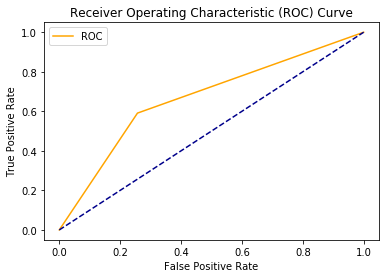

In [187]:
from sklearn.model_selection import train_test_split 
X = mortgage3[['dir','hir','lvr','Isblack','ccs']]
y = mortgage3['deny']
# split into 70:30 ration 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0) 
# import SMOTE module from imblearn library 
from imblearn.over_sampling import SMOTE 
sm = SMOTE(random_state = 2) 
X_train_res, y_train_res = sm.fit_sample(X_train, y_train.ravel()) 
lr1 = LogisticRegression() 
lr1.fit(X_train_res, y_train_res.ravel()) 
predictions = lr1.predict(X_test)  
# print classification report 
from sklearn.metrics import confusion_matrix, classification_report 
print(classification_report(y_test, predictions))

from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
def plot_roc_curve(fpr, tpr):
    plt.plot(fpr, tpr, color='orange', label='ROC')
    plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend()
    plt.show()
fpr, tpr, thresholds = roc_curve(y_test,predictions)
plot_roc_curve(fpr, tpr)

The model with exploratory variables 'dir','hir','lvr','black','ccs' increases the recall while decreasing the accuracy comparing with the model with exploratory variables 'dir','hir','lvr','black.

              precision    recall  f1-score   support

           0       0.91      0.73      0.81       292
           1       0.23      0.55      0.32        44

    accuracy                           0.70       336
   macro avg       0.57      0.64      0.57       336
weighted avg       0.82      0.70      0.75       336



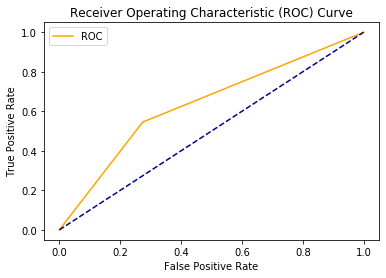

In [188]:
from sklearn.model_selection import train_test_split 
X = mortgage3[['dir','hir','lvr','Isblack','mcs']]
y = mortgage3['deny']
# split into 70:30 ration 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0) 
# import SMOTE module from imblearn library 
from imblearn.over_sampling import SMOTE 
sm = SMOTE(random_state = 2) 
X_train_res, y_train_res = sm.fit_sample(X_train, y_train.ravel()) 
lr1 = LogisticRegression() 
lr1.fit(X_train_res, y_train_res.ravel()) 
predictions = lr1.predict(X_test)  
# print classification report 
from sklearn.metrics import confusion_matrix, classification_report 
print(classification_report(y_test, predictions))

from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
def plot_roc_curve(fpr, tpr):
    plt.plot(fpr, tpr, color='orange', label='ROC')
    plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend()
    plt.show()
fpr, tpr, thresholds = roc_curve(y_test,predictions)
plot_roc_curve(fpr, tpr)

The model with exploratory variables 'dir','hir','lvr','black','mcs' decreases the recall while decreasing the accuracy comparing with the model with exploratory variables 'dir','hir','lvr','black'.

Therefore, the model with exploratory variables 'dir','hir','lvr','black','comdominiom' is the best model sacrificing some accuracy.

In [189]:
lr1.score(X_train, y_train)

0.6982097186700768

Recall from above we calculated the __null error rate__ for our data to be 50.0%. The model we've generated has an accuracy score of 75.45%. As such, our model appears to be useful.

In [190]:
# examine the model coefficients for the explanatory variables
print(X)
lr1.coef_

           dir       hir       lvr  Isblack       mcs
0     0.221000  0.221000  0.800000        0  2.000000
1     0.265000  0.265000  0.921875        0  2.000000
2     0.372000  0.248000  0.920398        0  2.000000
3     0.320000  0.250000  0.860465        0  2.000000
7     0.280000  0.220000  0.850000        0  2.000000
...        ...       ...       ...      ...       ...
2374  0.330000  0.160000  0.803030        0  1.000000
2375  0.310000  0.250000  0.800000        0  1.000000
2378  0.320000  0.260000  0.753846        1  1.000000
2379  0.350000  0.260000  0.813559        0  2.000000
2380  0.330814  0.255346  0.700783        0  1.721008

[1118 rows x 5 columns]


array([[ 0.95018859, -1.57176009,  2.45047121,  1.13828263,  0.41501271]])

From the above we see that:

- __dir__: An increase in the value of 'dir' is associated with a __decreased__ likelihood of being denied, i.e., applicants with higher dir were more likely to be approved than were applicants haveing relatively lower dir.


- __hir__: An increase in the value of 'hir' is associated with a __increased__ likelihood of being denied, i.e., applicants with higher hir were more likely to be denied than were applicants haveing relatively lower hir.


- __lvr__: An increase in the value of 'lvr' is associated with a __decreased__ likelihood of being denied, i.e., applicants with higher lvr were more likely to be denied than were applicants haveing relatively lower lvr.


- __Isblack__: Being black __decreased__ the likelihood of being denied.


- __comdominiom__: Having a comdominiom __decreased__ the likelihood of being denied.


- After using domain knowledge, I shrinked the size of data set

- After thorough EDA, I substituted the outliers with their means

- I have constructed several logistic regression model using different exploratory variables after applying SMOTE:
1. 'dir','hir','lvr','Isbad'
2. 'dir','hir','lvr','Isself'
3. 'dir','hir','lvr','Iblack'
4. 'dir','hir','lvr','Issingle'
5. 'dir','hir','lvr','Isblack','comdominiom'
6. 'dir','hir','lvr','Isblack','uria'
7. 'dir','hir','lvr','Isblack','ccs'
8. 'dir','hir','lvr','Isblack','mcs'

- After trials, I choose the logistic regression model with exploratory variables "dir","hir","lvr",'Isblack' and "comdominiom" as the best model to apply on logistic regression.

- The result did show discrimination exists in mortgage, black people with comdominiom would have more probability to be approved.


Aftering filling in outliers with means, I found the attribute which is binary that have strong relationship with deny is 'black' and 'comdominiom', therefore, in the next step, I would obviously include those two attributes as exploratory variables. 

## KNN models and SVM models

### KNN models:

I implement a built-in KNN model in the sequence:
- KNN model with exploratory variables'dir','hir','lvr','Isblack','comdominiom'
- KNN model with exploratory variables'dir','hir','lvr','Isblack','uria'
- KNN model with exploratory variables'dir','hir','lvr','Isblack','ccs','mcs'

[0 1 1 1 0 1 0 1 0 0 0 0 0 0 0 1 1 1 0 0 0 1 0 1 1 0 1 0 0 0 0 0 0 1 0 1 0
 0 0 1 1 0 0 0 1 1 1 0 0 0 1 1 0 0 0 1 0 0 0 0 0 0 1 1 1 1 0 1 0 0 0 0 0 0
 0 1 0 1 1 0 1 0 0 0 0 1 0 0 1 0 1 1 0 0 0 0 0 0 1 0 0 0 0 0 1 0 1 0 0 1 0
 0 1 0 0 1 0 0 0 0 0 0 1 1 0 0 1 0 0 0 0 1 0 1 1 0 0 0 0 0 0 0 1 1 0 0 0 0
 1 1 1 1 0 1 0 0 0 0 1 1 0 0 0 0 1 1 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 1 1 0 1
 1 1 1 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 1 1 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0
 0 1 1 0 1 0 1 0 1 0 1 0 1 0 1 1 1 0 1 0 0 1 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0
 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 1 0 0 1 0 1 0 0 1 0 0 0 1 1 0 1 1 0 0 1
 0 0 0 0 1 0 0 0 0 0 1 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0
 1 0 1]
              precision    recall  f1-score   support

           0       0.88      0.70      0.78       292
           1       0.16      0.39      0.23        44

    accuracy                           0.65       336
   macro avg       0.52      0.54      0.50       336
weighted avg       0.79      0.65      0.71  

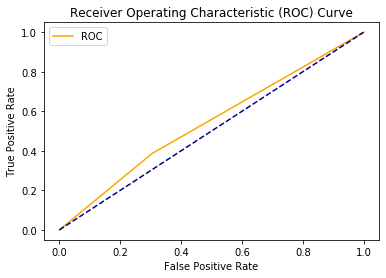

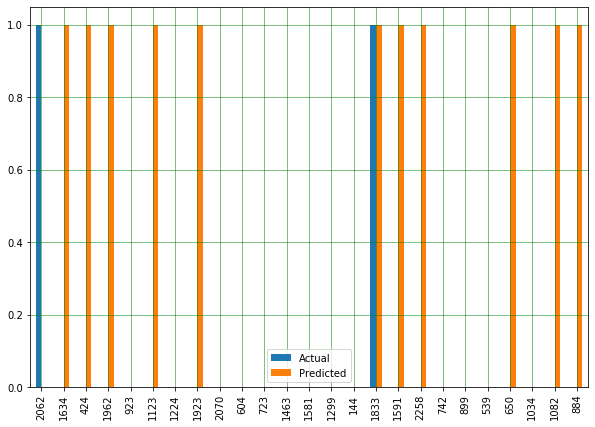

In [191]:
from sklearn.model_selection import train_test_split 
mortgage3['Isblack'] = (mortgage3['black'] == 'yes').astype(int)
mortgage3['deny'] = mortgage3.deny.astype('category').cat.codes
X = mortgage3[['dir','hir','lvr','Isblack','comdominiom']]
y = mortgage3['deny']
# split into 70:30 ration 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0) 
# import SMOTE module from imblearn library 
from imblearn.over_sampling import SMOTE 
sm = SMOTE(random_state = 2) 
X_train_res, y_train_res = sm.fit_sample(X_train, y_train.ravel()) 

from sklearn.neighbors import KNeighborsClassifier
neigh = KNeighborsClassifier(n_neighbors=3)

neigh.fit(X_train_res, y_train_res)

# Predicted class
print(neigh.predict(X_test))

predictions = neigh.predict(X_test)
from sklearn.metrics import confusion_matrix, classification_report 
print(classification_report(y_test, predictions))

from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
def plot_roc_curve(fpr, tpr):
    plt.plot(fpr, tpr, color='orange', label='ROC')
    plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend()
    plt.show()
fpr, tpr, thresholds = roc_curve(y_test,predictions)
plot_roc_curve(fpr, tpr)

from sklearn.model_selection import cross_val_score
cross_val_score(neigh, X, y, cv=5)


y_pred = neigh.predict(X_test)
dataprediction = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df1 = dataprediction.head(25)
df1.plot(kind='bar',figsize=(10,7))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

[1 0 0 1 0 1 0 1 0 1 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 1 1 0 1 1
 0 0 0 0 0 0 1 0 0 1 0 1 1 0 0 0 0 0 1 0 0 0 0 0 1 1 1 0 0 0 1 0 1 0 0 0 0
 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 1 1 0 0 1 0 0 0 0 0 0 0 1
 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 1 1 0 1 0 0 1 0 1 0 0 0 0 0 0 0 1
 0 0 0 1 0 0 0 0 0 1 0 1 0 0 1 1 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0
 0 0 1 0 0 1 0 0 0 0 0 0 0 1 0 0 1 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0
 0 1 1 0 1 0 0 1 1 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 1 1 0
 0 0 0 0 1 0 1 0 0 0 0 1 0 0 1 1 0 1 1 1 1 0 0 0 1 0 0 0 0 0 0 0 0 1 1 0 0
 0 0 0 0 1 1 0 0 0 1 1 1 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0
 0 0 0]
              precision    recall  f1-score   support

           0       0.88      0.76      0.82       292
           1       0.17      0.32      0.22        44

    accuracy                           0.70       336
   macro avg       0.52      0.54      0.52       336
weighted avg       0.79      0.70      0.74  

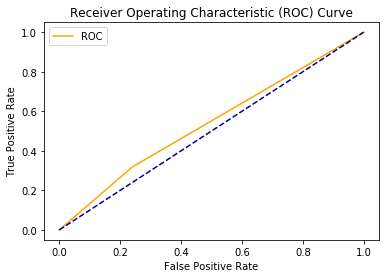

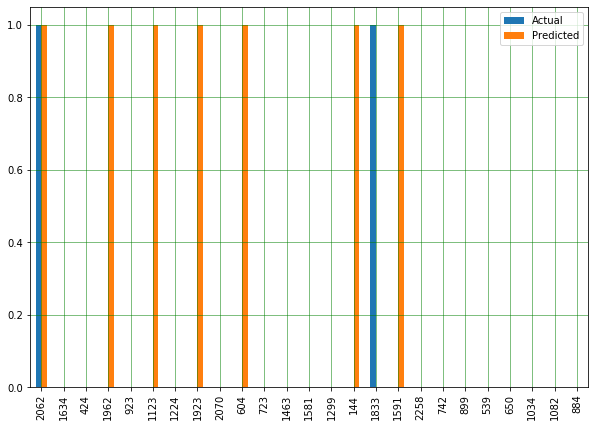

In [192]:
from sklearn.model_selection import train_test_split 
mortgage3['Isblack'] = (mortgage3['black'] == 'yes').astype(int)
mortgage3['deny'] = mortgage3.deny.astype('category').cat.codes
X = mortgage3[['dir','hir','lvr','Isblack','uria']]
y = mortgage3['deny']
# split into 70:30 ration 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0) 
# import SMOTE module from imblearn library 
from imblearn.over_sampling import SMOTE 
sm = SMOTE(random_state = 2) 
X_train_res, y_train_res = sm.fit_sample(X_train, y_train.ravel()) 

from sklearn.neighbors import KNeighborsClassifier
neigh = KNeighborsClassifier(n_neighbors=3)

neigh.fit(X_train_res, y_train_res)

# Predicted class
print(neigh.predict(X_test))

predictions = neigh.predict(X_test)
from sklearn.metrics import confusion_matrix, classification_report 
print(classification_report(y_test, predictions))

from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
def plot_roc_curve(fpr, tpr):
    plt.plot(fpr, tpr, color='orange', label='ROC')
    plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend()
    plt.show()
fpr, tpr, thresholds = roc_curve(y_test,predictions)
plot_roc_curve(fpr, tpr)

from sklearn.model_selection import cross_val_score
cross_val_score(neigh, X, y, cv=5)

y_pred = neigh.predict(X_test)
dataprediction = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df1 = dataprediction.head(25)
df1.plot(kind='bar',figsize=(10,7))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

[1 0 1 1 1 0 0 1 1 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 1 0 0 0 0 1 1 0 0 0 0 1 0 1 1 0 1 0 0 0 0 0 0 1 0 1 0 0 0 1 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 1 0 0 0 0 0 1 1 1 0 0 1 0 0 1 0
 1 1 1 0 0 1 0 1 0 0 0 0 0 0 0 1 0 0 0 1 1 0 1 0 1 1 1 0 1 0 0 0 0 0 0 0 0
 1 1 0 1 1 1 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0
 0 1 0 0 1 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 1 1 1 1 0 1
 1 0 1 0 0 1 0 0 0 1 1 0 0 1 1 0 1 0 0 0 1 0 0 0 0 0 0 1 0 1 1 0 0 0 0 1 0
 0 0 1 0 0 1 0 0 0 0 0 1 0 0 0 1 1 1 0 0 1 0 0 0 1 0 0 0 1 0 0 1 1 1 0 0 1
 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 1 0 1 0 0 1 0 0 0
 0 0 0]
              precision    recall  f1-score   support

           0       0.89      0.75      0.81       292
           1       0.20      0.41      0.26        44

    accuracy                           0.70       336
   macro avg       0.54      0.58      0.54       336
weighted avg       0.80      0.70      0.74  

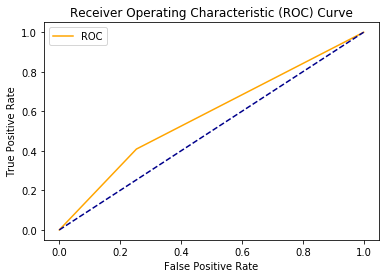

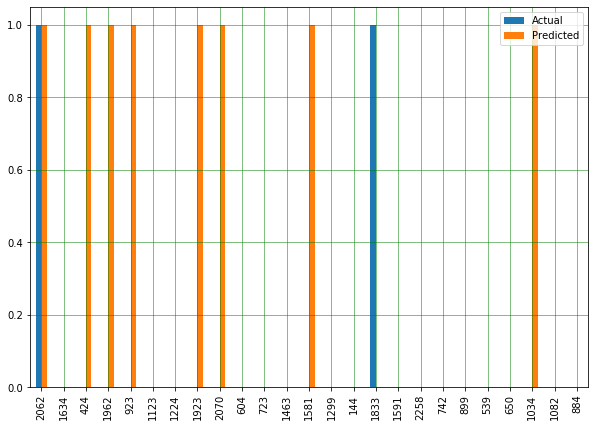

In [193]:
from sklearn.model_selection import train_test_split 
mortgage3['Isblack'] = (mortgage3['black'] == 'yes').astype(int)
mortgage3['deny'] = mortgage3.deny.astype('category').cat.codes
X = mortgage3[['dir','hir','lvr','Isblack','ccs','mcs']]
y = mortgage3['deny']
# split into 70:30 ration 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0) 
# import SMOTE module from imblearn library 
from imblearn.over_sampling import SMOTE 
sm = SMOTE(random_state = 2) 
X_train_res, y_train_res = sm.fit_sample(X_train, y_train.ravel()) 

from sklearn.neighbors import KNeighborsClassifier
neigh = KNeighborsClassifier(n_neighbors=3)

neigh.fit(X_train_res, y_train_res)

# Predicted class
print(neigh.predict(X_test))

predictions = neigh.predict(X_test)
from sklearn.metrics import confusion_matrix, classification_report 
print(classification_report(y_test, predictions))

from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
def plot_roc_curve(fpr, tpr):
    plt.plot(fpr, tpr, color='orange', label='ROC')
    plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend()
    plt.show()
fpr, tpr, thresholds = roc_curve(y_test,predictions)
plot_roc_curve(fpr, tpr)

from sklearn.model_selection import cross_val_score
cross_val_score(neigh, X, y, cv=5)

y_pred = neigh.predict(X_test)
dataprediction = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df1 = dataprediction.head(25)
df1.plot(kind='bar',figsize=(10,7))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

From the models above, I found the model with 'dir','hir','lvr','Isblack','ccs' and 'mcs' has better ROC curve and accuracy, also the best recall among those, therefore, I retain 'ccs' and 'mcs' and change other exploratory variables to see what happens:

I implement a built-in KNN model in the sequence:
- KNN model with exploratory variables 'dir','hir','uria','Isblack','ccs','mcs'
- KNN model with exploratory variables 'dir','pbcr','uria','Isblack','ccs','mcs'

[1 0 1 1 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 1 1 0 0 1 0 0 1 0 0 0 0 1 1 0
 0 1 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0
 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 1 0 0 0 1 0 0 0 1 1 0 0 0 1 0 1 0 0 0 0 0 0
 1 0 0 0 0 0 0 0 0 0 1 0 0 1 0 1 0 0 0 0 1 1 1 0 0 0 1 0 0 0 1 0 0 0 0 0 1
 0 0 0 1 0 0 0 0 1 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 1 0 1 0 0 0 0 1 0
 0 0 1 1 0 0 0 0 1 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 1 0 0 0 0 0 1 1 0 1 0 0 0 1
 0 0 1 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 1 0 1 0 0 1 0
 0 0 0]
              precision    recall  f1-score   support

           0       0.90      0.83      0.86       292
           1       0.25      0.39      0.30        44

    accuracy                           0.77       336
   macro avg       0.57      0.61      0.58       336
weighted avg       0.81      0.77      0.79  

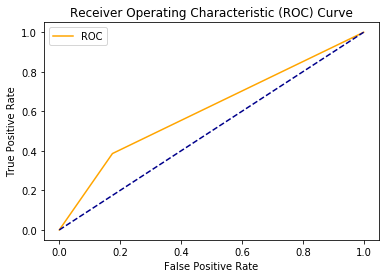

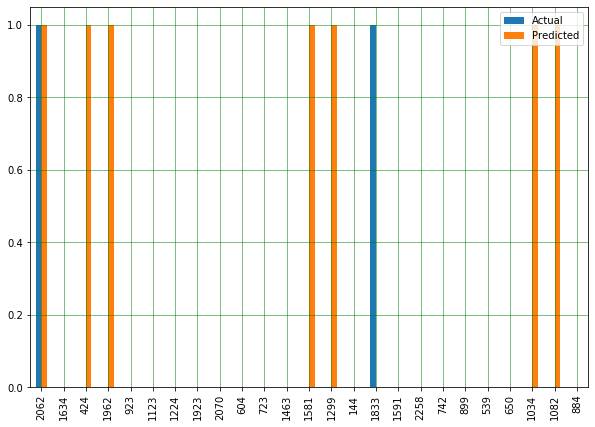

In [194]:
from sklearn.model_selection import train_test_split 
mortgage3['Isblack'] = (mortgage3['black'] == 'yes').astype(int)
mortgage3['deny'] = mortgage3.deny.astype('category').cat.codes
X = mortgage3[['dir','hir','uria','Isblack','ccs','mcs']]
y = mortgage3['deny']
# split into 70:30 ration 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0) 
# import SMOTE module from imblearn library 
from imblearn.over_sampling import SMOTE 
sm = SMOTE(random_state = 2) 
X_train_res, y_train_res = sm.fit_sample(X_train, y_train.ravel()) 

from sklearn.neighbors import KNeighborsClassifier
neigh = KNeighborsClassifier(n_neighbors=3)

neigh.fit(X_train_res, y_train_res)

# Predicted class
print(neigh.predict(X_test))

predictions = neigh.predict(X_test)
from sklearn.metrics import confusion_matrix, classification_report 
print(classification_report(y_test, predictions))

from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
def plot_roc_curve(fpr, tpr):
    plt.plot(fpr, tpr, color='orange', label='ROC')
    plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend()
    plt.show()
fpr, tpr, thresholds = roc_curve(y_test,predictions)
plot_roc_curve(fpr, tpr)

from sklearn.model_selection import cross_val_score
cross_val_score(neigh, X, y, cv=5)

y_pred = neigh.predict(X_test)
dataprediction = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df1 = dataprediction.head(25)
df1.plot(kind='bar',figsize=(10,7))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

[1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 1 0 0 0
 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 1 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 1
 0 1 0 0 0 0 0 0 1 0 1 0 1 0 0 1 0 0 0 1 0 0 0 1 0 1 0 0 0 0 0 0 1 1 0 0 0
 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 1 1 0 0 0
 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 1 1 0 0 0 0 1 1 0
 0 0 0]
              precision    recall  f1-score   support

           0       0.99      1.00      0.99       292
           1       0.98      0.93      0.95        44

    accuracy                           0.99       336
   macro avg       0.98      0.96      0.97       336
weighted avg       0.99      0.99      0.99  

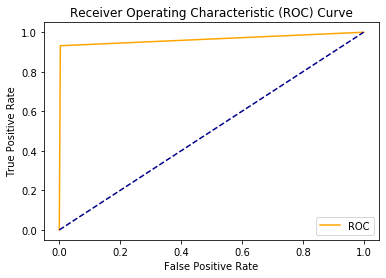

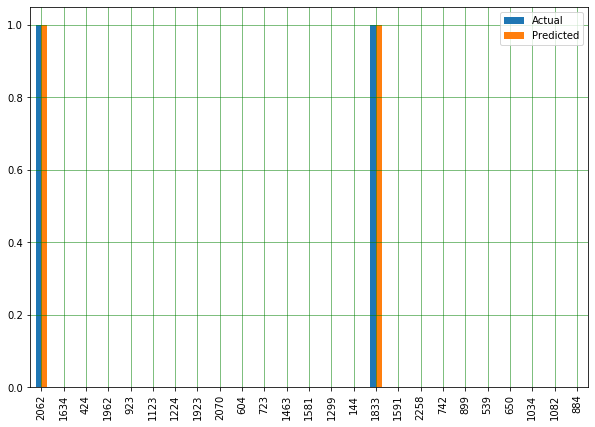

In [195]:
from sklearn.model_selection import train_test_split 
mortgage3['Isblack'] = (mortgage3['black'] == 'yes').astype(int)
mortgage3['pbcr'] = mortgage3.deny.astype('category').cat.codes
mortgage3['deny'] = mortgage3.deny.astype('category').cat.codes
X = mortgage3[['dir','pbcr','uria','Isblack','ccs','mcs']]
y = mortgage3['deny']
# split into 70:30 ration 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0) 
# import SMOTE module from imblearn library 
from imblearn.over_sampling import SMOTE 
sm = SMOTE(random_state = 2) 
X_train_res, y_train_res = sm.fit_sample(X_train, y_train.ravel()) 

from sklearn.neighbors import KNeighborsClassifier
neigh = KNeighborsClassifier(n_neighbors=3)

neigh.fit(X_train_res, y_train_res)

# Predicted class
print(neigh.predict(X_test))

predictions = neigh.predict(X_test)
from sklearn.metrics import confusion_matrix, classification_report 
print(classification_report(y_test, predictions))

from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
def plot_roc_curve(fpr, tpr):
    plt.plot(fpr, tpr, color='orange', label='ROC')
    plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend()
    plt.show()
fpr, tpr, thresholds = roc_curve(y_test,predictions)
plot_roc_curve(fpr, tpr)

from sklearn.model_selection import cross_val_score
cross_val_score(neigh, X, y, cv=5)

y_pred = neigh.predict(X_test)
dataprediction = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df1 = dataprediction.head(25)
df1.plot(kind='bar',figsize=(10,7))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

#### The model is already very good, could I get a better model with deleting a variable? I know that lvr is related with property, but in the model I use there is no 'lvr' attribute, therefore, mortgage credit score may be more important than consumer credit score, therefore I chose to delete 'ccs' variable to see whether it improves:

[1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 1 0 0 1
 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 1 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1
 0 1 0 0 0 0 0 0 1 0 1 0 1 0 0 1 0 0 0 1 0 0 0 1 0 1 0 0 0 0 0 0 1 1 0 0 0
 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 1 1 0 0 0
 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 1 1 0 0 0 0 1 1 0
 0 0 0]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       292
           1       1.00      1.00      1.00        44

    accuracy                           1.00       336
   macro avg       1.00      1.00      1.00       336
weighted avg       1.00      1.00      1.00  

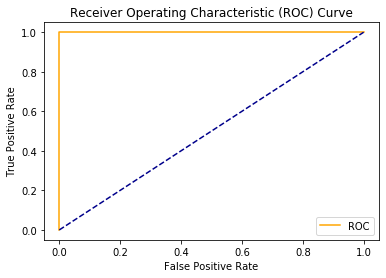

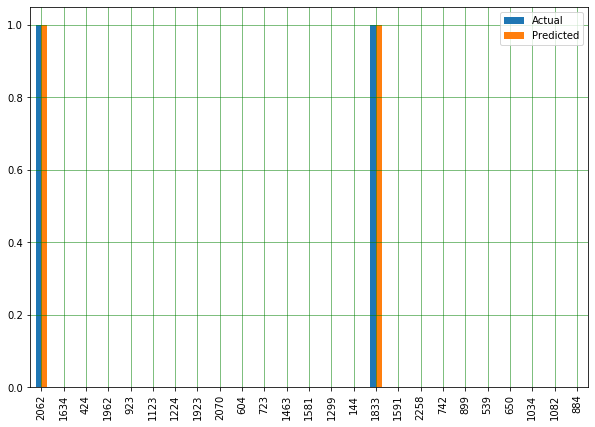

In [196]:
from sklearn.model_selection import train_test_split 
mortgage3['Isblack'] = (mortgage3['black'] == 'yes').astype(int)
mortgage3['pbcr'] = mortgage3.deny.astype('category').cat.codes
mortgage3['deny'] = mortgage3.deny.astype('category').cat.codes
X = mortgage3[['dir','pbcr','uria','Isblack','mcs']]
y = mortgage3['deny']
# split into 70:30 ration 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0) 
# import SMOTE module from imblearn library 
from imblearn.over_sampling import SMOTE 
sm = SMOTE(random_state = 2) 
X_train_res, y_train_res = sm.fit_sample(X_train, y_train.ravel()) 

from sklearn.neighbors import KNeighborsClassifier
neigh = KNeighborsClassifier(n_neighbors=3)

neigh.fit(X_train_res, y_train_res)

# Predicted class
print(neigh.predict(X_test))

predictions = neigh.predict(X_test)
from sklearn.metrics import confusion_matrix, classification_report 
print(classification_report(y_test, predictions))

from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
def plot_roc_curve(fpr, tpr):
    plt.plot(fpr, tpr, color='orange', label='ROC')
    plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend()
    plt.show()
fpr, tpr, thresholds = roc_curve(y_test,predictions)
plot_roc_curve(fpr, tpr)

from sklearn.model_selection import cross_val_score
cross_val_score(neigh, X, y, cv=5)

y_pred = neigh.predict(X_test)
dataprediction = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df1 = dataprediction.head(25)
df1.plot(kind='bar',figsize=(10,7))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

#### The model truly improves:

- I found the model with exploratory variables 'dir','pbcr','uria','Isblack','mcs' has the highest accuracy, highest precision, highest recall and highest f1-score amongst all the models, therefore, I think this is a perfect model of KNN.

### SVM models:

Let's build support vector machine model. First, import the SVM module and create support vector classifier object by passing argument kernel as the linear kernel in SVC() function.

Then, fit model on train set using fit() and perform prediction on the test set using predict().

First, I will construct the model using the exploratory variables 'dir','pbcr','uria','Isblack','mcs'.

[1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 1 0 0 1
 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 1 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1
 0 1 0 0 0 0 0 0 1 0 1 0 1 0 0 1 0 0 0 1 0 0 0 1 0 1 0 0 0 0 0 0 1 1 0 0 0
 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 1 1 0 0 0
 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 1 1 0 0 0 0 1 1 0
 0 0 0]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       292
           1       1.00      1.00      1.00        44

    accuracy                           1.00       336
   macro avg       1.00      1.00      1.00       336
weighted avg       1.00      1.00      1.00  

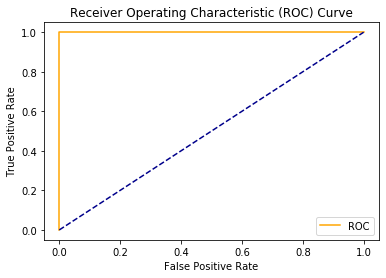

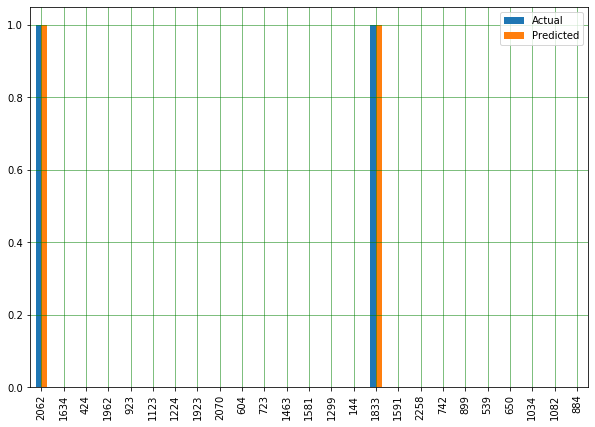

In [197]:
from sklearn.model_selection import train_test_split 
mortgage3['Isblack'] = (mortgage3['black'] == 'yes').astype(int)
mortgage3['pbcr'] = mortgage3.deny.astype('category').cat.codes
mortgage3['deny'] = mortgage3.deny.astype('category').cat.codes
X = mortgage3[['dir','pbcr','uria','Isblack','mcs']]
y = mortgage3['deny']
# split into 70:30 ration 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0) 
# import SMOTE module from imblearn library 
from imblearn.over_sampling import SMOTE 
sm = SMOTE(random_state = 2) 
X_train_res, y_train_res = sm.fit_sample(X_train, y_train.ravel()) 

#Import svm model
from sklearn import svm

#Create a svm Classifier
clf = svm.SVC(kernel='linear') # Linear Kernel

#Train the model using the training sets
clf.fit(X_train_res, y_train_res)

#Predict the response for test dataset
print(clf.predict(X_test))

predictions = clf.predict(X_test)
from sklearn.metrics import confusion_matrix, classification_report 
print(classification_report(y_test, predictions))

from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
def plot_roc_curve(fpr, tpr):
    plt.plot(fpr, tpr, color='orange', label='ROC')
    plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend()
    plt.show()
fpr, tpr, thresholds = roc_curve(y_test,predictions)
plot_roc_curve(fpr, tpr)

from sklearn.model_selection import cross_val_score
cross_val_score(clf, X, y, cv=5)

y_pred = clf.predict(X_test)
dataprediction = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df1 = dataprediction.head(25)
df1.plot(kind='bar',figsize=(10,7))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

[1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 1 0 0 1
 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 1 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1
 0 1 0 0 0 0 0 0 1 0 1 0 1 0 0 1 0 0 0 1 0 0 0 1 0 1 0 0 0 0 0 0 1 1 0 0 0
 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 1 1 0 0 0
 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 1 1 0 0 0 0 1 1 0
 0 0 0]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       292
           1       1.00      1.00      1.00        44

    accuracy                           1.00       336
   macro avg       1.00      1.00      1.00       336
weighted avg       1.00      1.00      1.00  

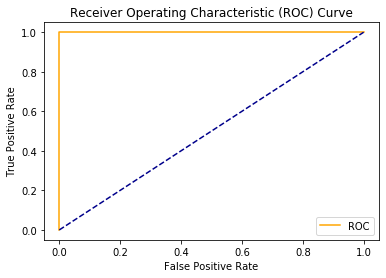

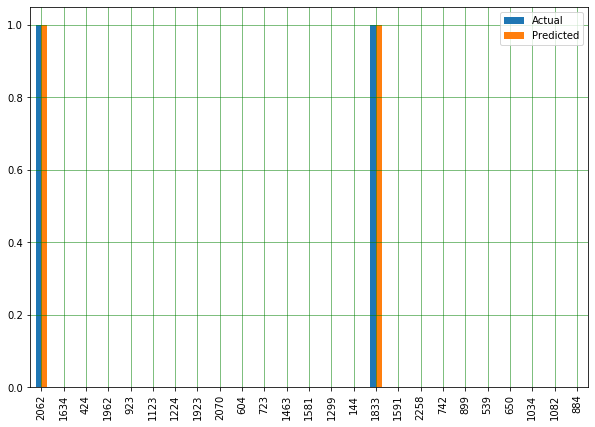

In [198]:
from sklearn.model_selection import train_test_split 
mortgage3['Isblack'] = (mortgage3['black'] == 'yes').astype(int)
mortgage3['dmi'] = mortgage3.deny.astype('category').cat.codes
mortgage3['deny'] = mortgage3.deny.astype('category').cat.codes
X = mortgage3[['dir','dmi','uria','Isblack','mcs']]
y = mortgage3['deny']
# split into 70:30 ration 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0) 
# import SMOTE module from imblearn library 
from imblearn.over_sampling import SMOTE 
sm = SMOTE(random_state = 2) 
X_train_res, y_train_res = sm.fit_sample(X_train, y_train.ravel()) 

#Import svm model
from sklearn import svm

#Create a svm Classifier
clf = svm.SVC(kernel='linear') # Linear Kernel

#Train the model using the training sets
clf.fit(X_train_res, y_train_res)

#Predict the response for test dataset
print(clf.predict(X_test))

predictions = clf.predict(X_test)
from sklearn.metrics import confusion_matrix, classification_report 
print(classification_report(y_test, predictions))

from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
def plot_roc_curve(fpr, tpr):
    plt.plot(fpr, tpr, color='orange', label='ROC')
    plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend()
    plt.show()
fpr, tpr, thresholds = roc_curve(y_test,predictions)
plot_roc_curve(fpr, tpr)

from sklearn.model_selection import cross_val_score
cross_val_score(clf, X, y, cv=5)

y_pred = clf.predict(X_test)
dataprediction = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df1 = dataprediction.head(25)
df1.plot(kind='bar',figsize=(10,7))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

From the models I constructed, I found the SVM model with exploratory variables 'dir','pbcr','uria','Isblack','mcs'. and 'dir','dmi','uria','Isblack','mcs' both display good accuracy, good precsion, good recall and good f1 score, good ROC curve and good cross validation scores, therefore, either one of them is best model.


## Conclusion:
### For the KNN model, the model with exploratory variables 'dir','pbcr','uria','Isblack','mcs' is the best,
### For the SVM model, the model with exploratory variables 'dir','pbcr'(or 'dmi'),'uria','Isblack','mcs' is the best.

### Which means if we have one person's information about dir, pbcr, dmi, uria, his/her skin color, mortgage credit score, it is very probable to predict whether he could be denied or apporved either using KNN model or SVM model. 